In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

In [ ]:
train = pd.read_csv('/content/Train.csv')

# **Data understanidng**

In [ ]:
train.shape

(40776, 32)

In [ ]:
train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V13', 'V19', 'V22', 'V30', 'V33', 'V35', 'V36', 'V40', 'V41', 'V42',
       'V43', 'V45', 'V47', 'V50', 'V51', 'V52', 'V59', 'V63', 'V72', 'V75',
       'class'],
      dtype='object')

In [ ]:
train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V13,V19,V22,V30,V33,V35,V36,V40,V41,V42,V43,V45,V47,V50,V51,V52,V59,V63,V72,V75,class
count,40776.000000,40776.000000,40776.000000,40776.000000,40776.000000,40776.000000,40776.000000,40776.000000,40776.000000,40776.000000,40776.000000,40776.000000,40776.000000,40776.000000,40776.000000,40776.000000,40776.000000,40776.000000,40776.000000,40776.000000,40776.000000,40776.000000,40776.000000,40776.000000,40776.000000,40776.000000,40776.000000,40776.00000,40776.000000,40776.000000,40776.00000,40776.000000
mean,4.167206,107.012041,28.035879,8.250221,1714.740092,76.849029,28.728124,17.533721,149.706837,0.736144,4.617765,8.216721,5.497719,1.992962,2.145993,1.776437,8.114381,6.048632,19.015818,1.925643,12.134319,98.476383,2.658598,6.238817,19.605233,3.231043,0.674563,19.08917,5.937071,3.171204,3.19482,0.501251
std,9.952973,389.279030,394.669313,8.942177,4789.147970,243.058478,83.490689,13.917054,272.661541,0.714021,7.121454,11.199102,2.225232,0.118128,2.194815,1.156815,2.255982,1.985358,68.493016,1.151062,13.628134,278.693054,2.680439,2.586094,71.480746,6.009488,0.710048,64.79848,2.014287,5.747578,5.77309,0.500005
min,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,1.000000,3.000000,2.000000,15.000000,4.000000,3.000000,6.000000,18.000000,0.000000,1.000000,2.000000,3.000000,2.000000,1.000000,1.000000,8.000000,6.000000,1.000000,1.000000,2.000000,6.000000,1.000000,5.000000,1.000000,1.000000,0.000000,1.00000,6.000000,1.000000,1.00000,0.000000
50%,1.000000,5.000000,7.000000,5.000000,401.000000,18.000000,8.000000,14.000000,59.000000,1.000000,2.000000,4.000000,7.000000,2.000000,1.000000,2.000000,9.000000,6.000000,4.000000,2.000000,7.000000,26.000000,1.000000,8.000000,4.000000,1.000000,1.000000,4.00000,6.000000,1.000000,1.00000,1.000000
75%,4.000000,42.000000,18.000000,11.000000,1658.000000,62.000000,23.000000,27.000000,166.000000,1.000000,5.000000,11.000000,7.000000,2.000000,3.000000,3.000000,9.000000,7.000000,14.000000,3.000000,18.000000,85.000000,5.000000,8.000000,14.000000,3.000000,1.000000,14.00000,7.000000,3.000000,3.00000,1.000000
max,816.000000,12274.000000,32743.000000,130.000000,373199.000000,14843.000000,4245.000000,52.000000,7082.000000,7.000000,136.000000,332.000000,9.000000,2.000000,7.000000,3.000000,9.000000,12.000000,3778.000000,3.000000,515.000000,12075.000000,8.000000,10.000000,4552.000000,136.000000,7.000000,2863.00000,13.000000,117.000000,136.00000,1.000000


Drawing plots to understand the features


In [ ]:
plt.figure(figsize=(30,15))
sns.countplot(train['class'])
for i,j in enumerate(train.columns):
  plt.subplot(6,6,i+1)
  sns.boxplot(train[f'{j}'])
plt.show()

Thus the plots show we have **outliers** in the data for most of the features

making a copy for future changes

In [ ]:
new_train = train.copy()
new_train.shape

(40776, 32)

# **Deleting outliers**

deleting outliers for each feature which comes after its 4 standard deviation to not lose much of the data

In [ ]:
for(i,j) in enumerate(new_train.columns):
  upperlim_v1 = train[f'{j}'].mean() + 4*train[f'{j}'].std()
  lowerlim_v1 = train[f'{j}'].mean() - 4*train[f'{j}'].std()
  new_train = new_train.loc[(new_train[f'{j}'] < upperlim_v1)].copy()
  new_train = new_train.loc[(new_train[f'{j}'] > lowerlim_v1)].copy()

In [ ]:
new_train.shape

(35289, 32)

In [ ]:
new_train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V13,V19,V22,V30,V33,V35,V36,V40,V41,V42,V43,V45,V47,V50,V51,V52,V59,V63,V72,V75,class
count,35289.000000,35289.000000,35289.000000,35289.000000,35289.000000,35289.000000,35289.000000,35289.000000,35289.000000,35289.000000,35289.000000,35289.000000,35289.000000,35289.0,35289.000000,35289.000000,35289.000000,35289.000000,35289.000000,35289.000000,35289.000000,35289.000000,35289.000000,35289.000000,35289.000000,35289.000000,35289.000000,35289.000000,35289.000000,35289.000000,35289.000000,35289.000000
mean,3.384794,68.016606,19.189152,7.936241,1465.464734,59.550993,20.285103,17.290856,122.970812,0.711978,3.941143,7.641985,5.487376,2.0,2.114087,1.772677,8.113718,6.046983,14.677067,1.929411,12.056618,80.203690,2.662983,6.243674,15.357108,2.770637,0.659667,14.807674,5.936099,2.708663,2.739721,0.502310
std,5.695650,189.877494,47.325694,8.039090,2446.623778,114.240515,36.262378,13.751392,177.433921,0.662038,4.740443,8.740919,2.230578,0.0,2.190245,1.157222,2.259321,1.978132,30.655319,1.150404,12.925085,148.192641,2.684323,2.585862,32.266201,3.926097,0.678027,30.556822,2.014927,3.771672,3.823440,0.500002
min,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,3.000000,2.000000,15.000000,4.000000,3.000000,6.000000,17.000000,0.000000,1.000000,2.000000,3.000000,2.0,1.000000,1.000000,9.000000,6.000000,1.000000,1.000000,2.000000,6.000000,1.000000,5.000000,1.000000,1.000000,0.000000,1.000000,6.000000,1.000000,1.000000,0.000000
50%,1.000000,4.000000,7.000000,5.000000,429.000000,18.000000,7.000000,14.000000,54.000000,1.000000,2.000000,4.000000,7.000000,2.0,1.000000,2.000000,9.000000,6.000000,4.000000,2.000000,7.000000,25.000000,1.000000,8.000000,4.000000,1.000000,1.000000,4.000000,6.000000,1.000000,1.000000,1.000000
75%,4.000000,38.000000,18.000000,11.000000,1644.000000,59.000000,21.000000,27.000000,150.000000,1.000000,5.000000,10.000000,7.000000,2.0,3.000000,3.000000,9.000000,7.000000,14.000000,3.000000,18.000000,83.000000,5.000000,8.000000,14.000000,3.000000,1.000000,14.000000,7.000000,3.000000,3.000000,1.000000
max,43.000000,1662.000000,1483.000000,44.000000,20625.000000,1049.000000,362.000000,49.000000,1239.000000,3.000000,33.000000,53.000000,9.000000,2.0,7.000000,3.000000,9.000000,12.000000,291.000000,3.000000,66.000000,1213.000000,8.000000,10.000000,304.000000,27.000000,3.000000,278.000000,13.000000,26.000000,26.000000,1.000000


# **Feature engeneering**

checking at correlation values so that to reomve duplicates of data(ie the ones wiht high correlation value)

<Axes: >

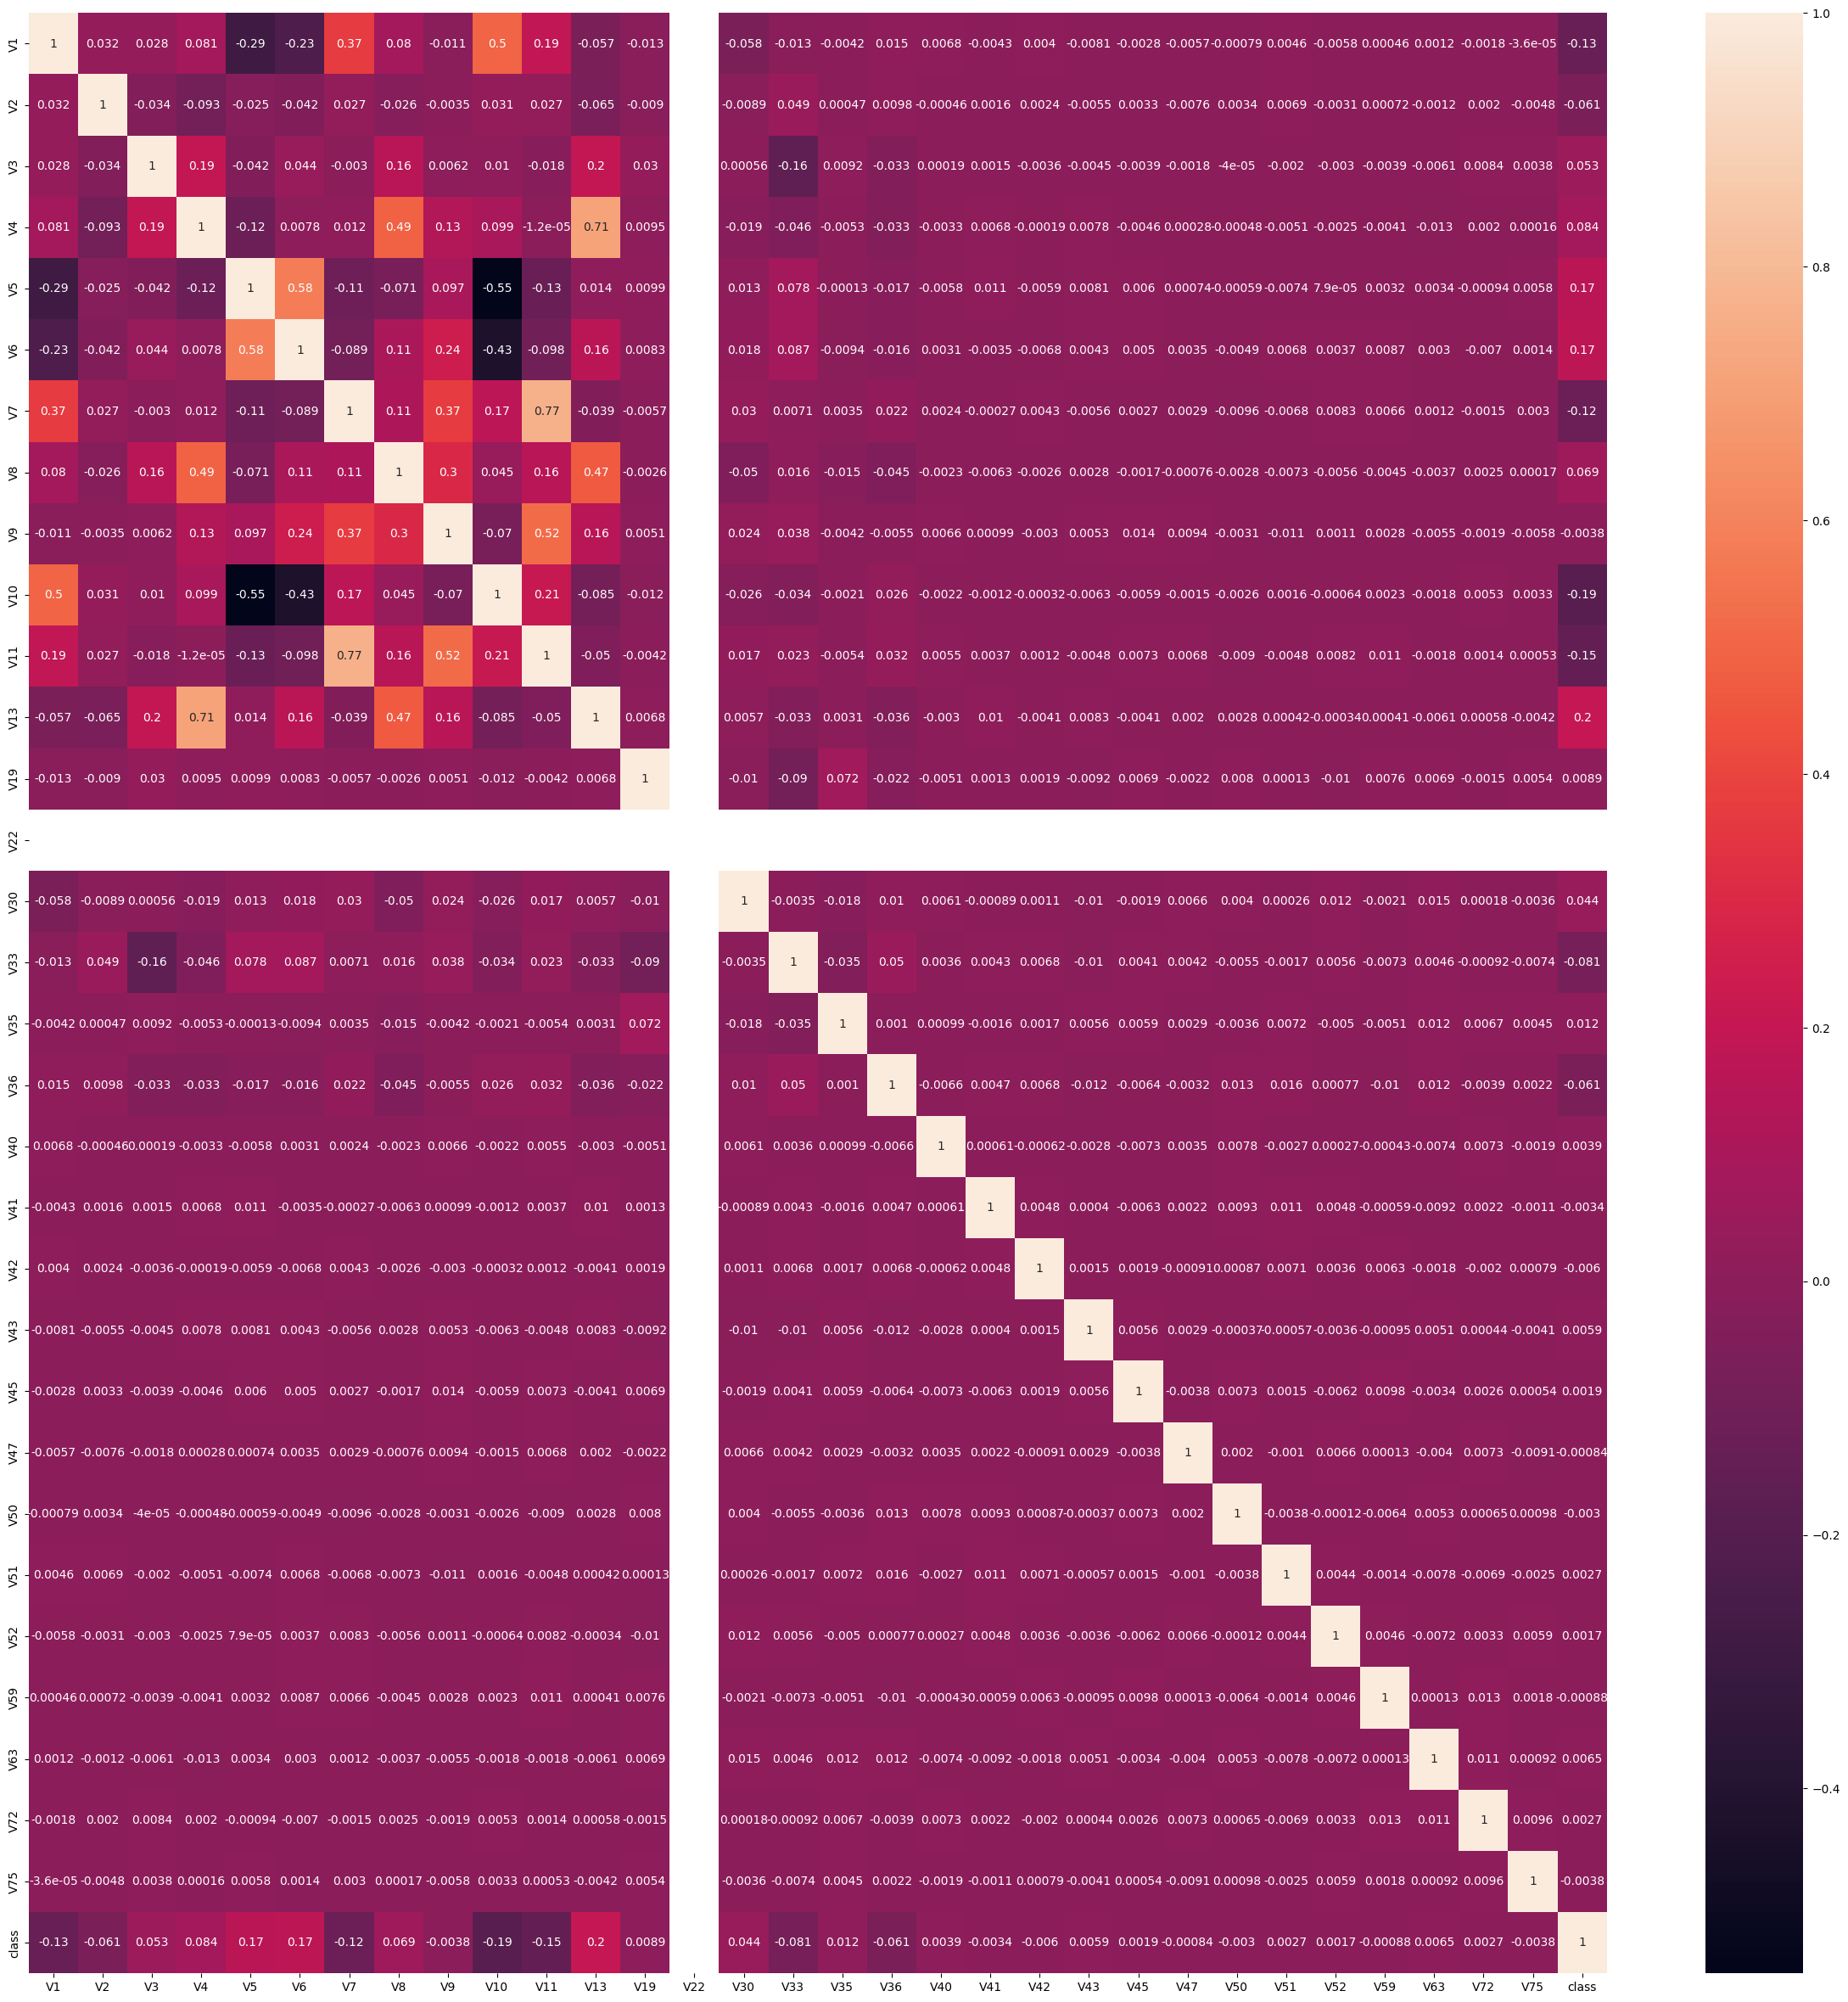

In [ ]:
corr = new_train.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr,annot=True)

creating new variables V76 and V77 as the (sum of V11 and V7) and (V13 and 4)
since V11 and V7 have a good correlation value and similar case with V13 and V4

In [ ]:
new_train['V76'] = (new_train['V11']+new_train['V7'])
new_train['V77'] = (new_train['V13']+new_train['V4'])
new_train = new_train.drop(columns=['V11','V7', 'V13','V4']).copy()

# **Splitting Data and Scaling**

In [ ]:
X = new_train.drop(labels = ['class'],axis = 1)
y = new_train['class']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.4)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model = scaler.fit(X_train)
X_train = model.transform(X_train).copy()

# **Models**

Experimentally adjusting the threshold value to get the best score

## **Logistic Regression**


In [ ]:
lr=LogisticRegression(max_iter = 5000)
lr.fit(X_train, y_train)
y_pred = lr.predict_proba(X_val)
y_perd  = y_pred[:,1]
y_perd = np.where(y_perd > 0.4, 1, 0)
f1 = f1_score(y_val, y_perd)
print(f"F1 score: {f1}")

F1 score: 0.6810285714285714


## **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : [700,750,800,850]}
knn = GridSearchCV(KNN(metric = 'manhattan',weights = 'distance'), grid_params, verbose = 1, cv=2, n_jobs = -1,scoring=f1_score)
knn_best = knn.fit(X_train, y_train)

print(knn_best.best_params_)

y_pred = knn_best.predict_proba(X_val)
y_perd  = y_pred[:,1]
y_perd = np.where(y_perd > 0.47, 1, 0)
f1 = f1_score(y_val, y_perd)
print(f"F1 score: {f1}")

Fitting 2 folds for each of 4 candidates, totalling 8 fits
{'n_neighbors': 700}
F1 score: 0.694845142129826


## **SVM**

In [ ]:
from sklearn import svm
clf = svm.SVC(probability=True)
clf.fit(X_train, y_train)
y_pred_svm = clf.predict(X_val)
y_perd_svm = np.where(y_pred_svm > 0.5, 1, 0)
f1 = f1_score(y_val, y_perd)
print(f"F1 score: {f1}")

F1 score: 0.694845142129826


## **Naive bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_val)
f1 = f1_score(y_val, y_pred)
print(f"F1 score: {f1}")

F1 score: 0.6744947499153211


# **Submission**

Preprocessing test data

In [ ]:
# test_data = pd.read_csv("/content/Test.csv")
# test_data['V76'] = (test_data['V11']+test_data['V7'])
# test_data['V77'] = (test_data['V13']+test_data['V14'])
# test_data = test_data.drop(['V72','V75','V50','V59'],axis=1)

Submission file

In [ ]:
# test_data = pd.read_csv("/content/Test.csv")
# Index=test_data['Index']
# test_data.drop(['Index'],axis=1,inplace=True)
# y_test = MODEL_NAME.predict(test_data)

# result = pd.DataFrame({
#     'Index': Index,
#     'class': y_test
# })

# result.to_csv("FILENAME.csv", index=False)